In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy import stats

In [2]:
n = 21
x = np.linspace(0, 20, n)
w = np.array([-6, 0.75])
y = w[0] + w[1] * x + stats.norm.rvs(size = n)

In [16]:
def recursive_mean(n, x, xbar):
    return x if n == 0 else xbar + (x - xbar) / (n + 1.0)

def recursive_cxx(n, x, xbar, xbar_next, cxx):
    if n == 0:
        return 0
    else:
        return (x ** 2 + n * cxx + n * xbar ** 2 - (n + 1) * xbar_next ** 2) / (n + 1.0)

def recursive_cxy(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy):
    if n == 0:
        return 0
    else:
        return (x * y + n * cxy + n * xbar * ybar - (n + 1) * xbar_next * ybar_next) / (n + 1.0)
    
def regress(n, xbar, ybar, cxx, cxy, x, y):    
    xbar_next = recursive_mean(n, x, xbar)
    ybar_next = recursive_mean(n, y, ybar)
    cxx = recursive_cxx(n, x, xbar, xbar_next, cxx)
    cxy = recursive_cxy(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy)
    xbar = xbar_next
    ybar = ybar_next
    w1 = 0 if cxx == 0 else cxy / cxx
    w0 = ybar - w1 * xbar
    return w0, w1, xbar, ybar, cxx, cxy 

In [22]:
def regress(n, xbar, ybar, cxx, cxy, x, y):    
    xbar = recursive_mean(n, x, xbar)
    ybar = recursive_mean(n, y, ybar)
    cxx = 0 if n == 0 else cxx + x ** 2
    cxy = 0 if n == 0 else cxy + x * y
    w1 = 0 if cxx == 0 else (cxy - n * xbar * ybar) / (cxx - n * xbar ** 2)
    w0 = ybar - w1 * xbar
    return w0, w1, xbar, ybar, cxx, cxy 

In [4]:
def regress(n, x, y, sx, sy, sxx, sxy):
    sx += x
    sy += y
    sxx += x * x
    sxy += x * y
    d = sxx - sx * sx / n
    w1 = 0 if d == 0 else (sxy - sx * sy / n) / d
    w0 = (sy - w1 * sx) / n
    return w0, w1, sx, sy, sxx, sxy

sx = sy = sxx = sxy = 0.0

for i in range(n):
    w0, w1, sx, sy, sxx, sxy = regress(i, x[i], y[i], sx, sy, sxx, sxy)

print w0, w1

-7.19328656542 0.809032498652


/home/greg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/home/greg/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


-6.0 0.75
-4.70661294515 0.634813610129 10.0 1.64152315614 2870.0 880.592472041
-5.31786137959 0.695938453573 10.0 1.64152315614 36.6666666667 25.5177432977
[-5.31786138  0.69593845]


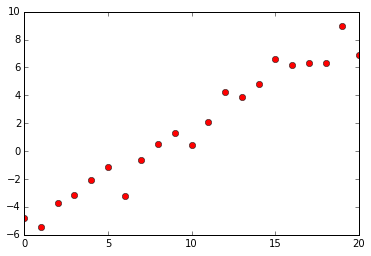

In [23]:
xbar = ybar = cxx = cxy = 'blah'

for i in range(n):
    w0, w1, xbar, ybar, cxx, cxy = regress(i, xbar, ybar, cxx, cxy, x[i], y[i])

print w[0], w[1]
print w0, w1, xbar, ybar, cxx, cxy

xbar = np.mean(x)
ybar = np.mean(y)
cxx = sum((x - xbar) ** 2) / n
cxy = sum((x - xbar) * (y - ybar) ) / n
w1 = cxy / cxx
w0 = ybar - w1 * xbar
print w0, w1, xbar, ybar, cxx, cxy

X = np.hstack((np.ones((n, 1)), x.reshape(n, 1)))
print inv(X.T.dot(X)).dot(X.T).dot(y)

plt.plot(x, y, 'ro')
plt.show()